In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.dropna()
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<h3>Ik heb er voor gekozen om de voor de hand liggende waardes te maken die te maken zouden kunnen hebben met attrition</h3>

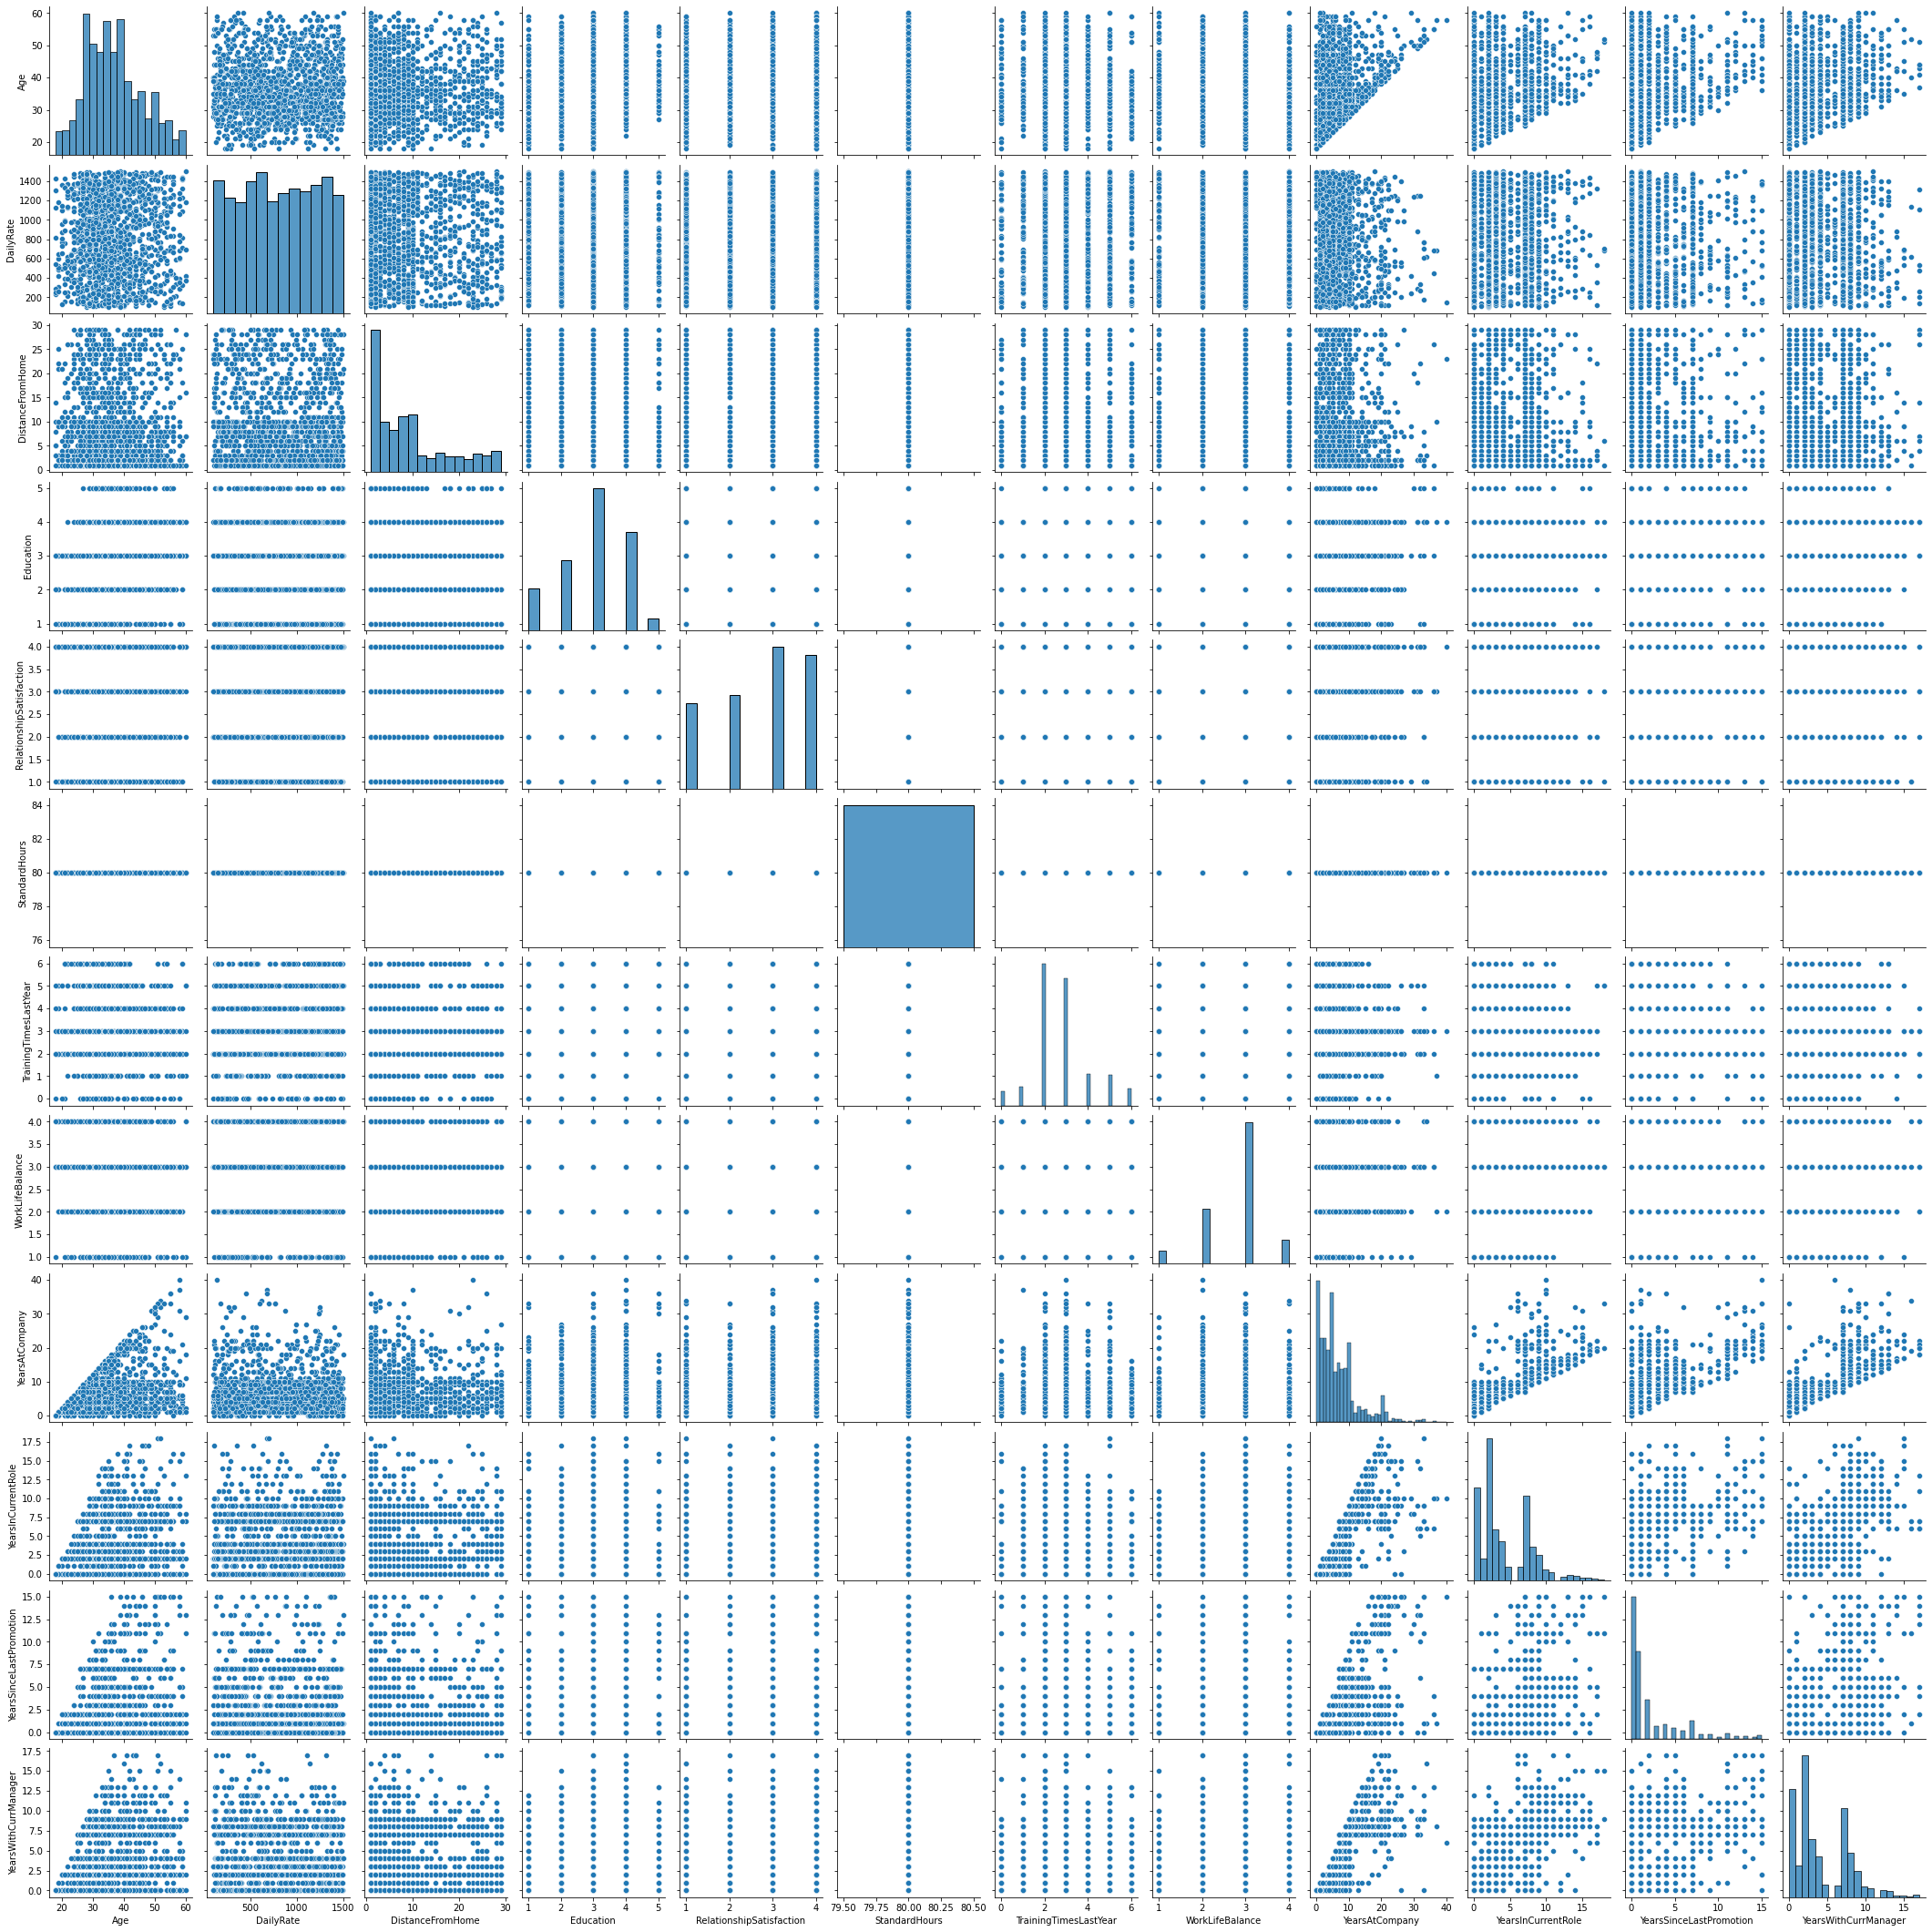

In [4]:
df_subset = df[["Age", "DailyRate", "DistanceFromHome", "Education", "RelationshipSatisfaction", "StandardHours", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]]
sns.pairplot(df_subset)
plt.show() #using Matplotlib to show the plot

In [5]:
X = df[["Age", "RelationshipSatisfaction", "StandardHours", "TrainingTimesLastYear", "WorkLifeBalance", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]] #create the X matrix
X = normalize(X)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<h3>Na wat testen bleek dat salaris en reistijd helemaal geen goede impact hadden op het model. We kregen een lagere voorspellings waardes door deze waardes mee te nemen. Daarom heb ik deze er dus uit gelaten.</h3>

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8367346938775511

In [7]:
y_test_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[356,   8],
       [ 64,  13]], dtype=int64)

<h3>Uiteindelijk heeft het model een 83.67% van de voorspellingen goed. Uiteindelijk heeft hij er 8 voorspelt als True terwijl ze False waren en 13 als False terwijl ze True waren.</h3>

In [8]:
conf_matrix = pd.DataFrame(cm, index=["Attrition_False", "Attrition_True"], columns = ["Attrition_False_p", "Attrition_True_p"]) 
conf_matrix

,Attrition_False_p,Attrition_True_p
Attrition_False,356,8
Attrition_True,64,13


<h3>Uit verdere test blijkt dat hoe lang mensen bij het bedrijf werken, jaren tot laatste promotie, jaren onder de zelfde manager en leeftijd de grootste impact hebben op de resultaten.</h3>
<h3>Zelf vindt ik het dus wel interesant dat salaris, reistijd en relatie voldoening een negatieve impact hadden op de resultaten.</h3>